In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import matplotlib

In [6]:
matplotlib.rcParams["figure.figsize"]=(20,10)

In [7]:
df1=pd.read_csv("bengaluru_house_prices.csv")

In [8]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [9]:
df1.shape

(13320, 9)

In [10]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [11]:
df2=df1.dropna()

In [12]:
df2.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [13]:
df2=df2.drop(['society','balcony','availability','area_type'],axis='columns')

In [14]:
df2.shape

(7496, 5)

In [15]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
5,Whitefield,2 BHK,1170,2.0,38.00
11,Whitefield,4 Bedroom,2785,5.0,295.00


In [16]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 RK', '4 BHK',
       '1 BHK', '5 BHK', '11 BHK', '5 Bedroom', '9 BHK', '2 Bedroom',
       '6 BHK', '7 BHK', '6 Bedroom'], dtype=object)

In [17]:
df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))

In [18]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
5,Whitefield,2 BHK,1170,2.0,38.00,2
11,Whitefield,4 Bedroom,2785,5.0,295.00,4


In [19]:
df2['bhk'].unique()

array([ 2,  4,  3,  1,  5, 11,  9,  6,  7], dtype=int64)

In [20]:
df2[df2.bhk>10]

,location,size,total_sqft,bath,price,bhk
459,1 Giri Nagar,11 BHK,5000,9.0,360.0,11


In [21]:
df2.total_sqft.unique()

array(['1056', '2600', '1521', ..., '1919', '2111', '4689'], dtype=object)

In [22]:
df2['total_sqft'].unique()

array(['1056', '2600', '1521', ..., '1919', '2111', '4689'], dtype=object)

In [23]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [24]:
df2[-df2['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [25]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [26]:
df3=df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft_to_num)
df3.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
11,Whitefield,4 Bedroom,2785.0,5.0,295.00,4


In [27]:
# outlier cleaning

In [28]:
df3['price_sqft']=df3['price']*100000/df3['total_sqft']
df3.head()

,location,size,total_sqft,bath,price,bhk,price_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
11,Whitefield,4 Bedroom,2785.0,5.0,295.00,4,10592.459605


In [29]:
len(df3['location'].unique())

634

In [30]:
df3.location= df3.location.apply(lambda x:x.strip())
df3.head()

,location,size,total_sqft,bath,price,bhk,price_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
11,Whitefield,4 Bedroom,2785.0,5.0,295.00,4,10592.459605


In [31]:
location_stats=df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
len(location_stats[location_stats<=10])

483

In [32]:
location_stats_lt_10=location_stats[location_stats<=10]
len(location_stats_lt_10)
len(df3['location'].unique())

626

In [33]:
df3.location=df3.location.apply(lambda x:'other' if x in location_stats_lt_10 else x)
len(df3['location'].unique())

144

In [34]:
df3.head(144)

,location,size,total_sqft,bath,price,bhk,price_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
11,Whitefield,4 Bedroom,2785.0,5.0,295.00,4,10592.459605
...,...,...,...,...,...,...,...
243,other,3 BHK,1644.0,3.0,84.00,3,5109.489051
244,other,2 BHK,1285.0,2.0,72.50,2,5642.023346
246,Electronic City,2 BHK,910.0,2.0,40.00,2,4395.604396
247,Kothanur,3 BHK,1577.0,3.0,70.00,3,4438.807863


In [35]:
df3.shape

(7496, 7)

In [36]:
df4=df3[~((df3.total_sqft/df3.bhk)<100)]
df4.shape

(7494, 7)

In [37]:
df4=df4[~(df4.total_sqft/df4.bhk<300)]
df4.shape

(7454, 7)

In [38]:
df4.price_sqft.describe()

count     7439.000000
mean      5851.020195
std       2705.465697
min        371.428571
25%       4283.397683
50%       5319.284802
75%       6693.881632
max      76530.612245
Name: price_sqft, dtype: float64

In [39]:
def remove_pps_outlier(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_sqft)
        st=np.std(subdf.price_sqft)
        reduced_df=subdf[(subdf.price_sqft>(m-st)) & (subdf.price_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df4=remove_pps_outlier(df4)
df4.shape

(5862, 7)

In [40]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_sqft),
                'std':np.std(bhk_df.price_sqft),
                'count':bhk_df.shape[0]                
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_sqft<(stats['mean'])].index_values)
        return df.drop(exclude_indices,axis='index')

df5=remove_bhk_outliers(df4)
df5.shape

(5862, 7)

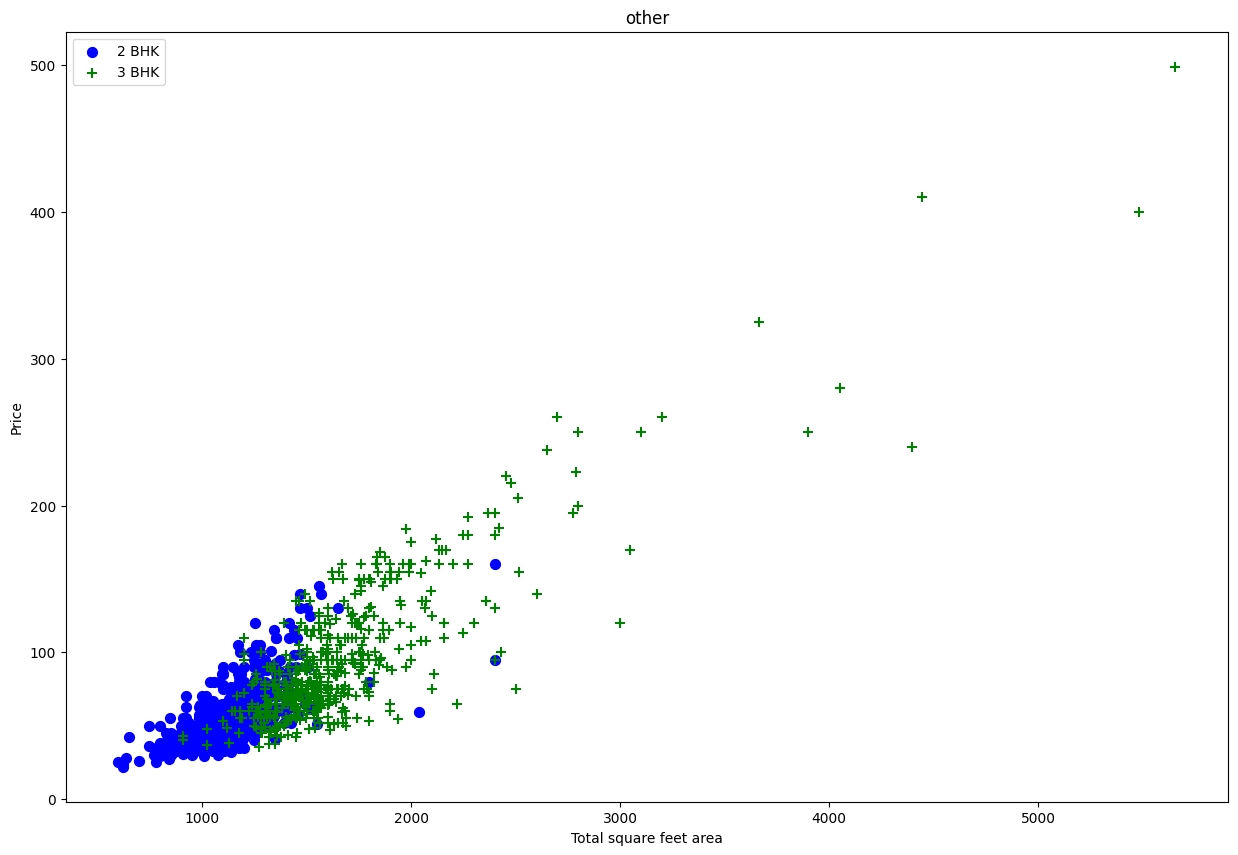

In [41]:
def plot_scatter(df,location):
    bhk2=df[(df.location==location)&(df.bhk==2)]
    bhk3=df[(df.location==location)&(df.bhk==3)] 
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)  
    plt.xlabel("Total square feet area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend(location)
    plt.legend()
    

plot_scatter(df4,'other')   

In [42]:
df5.bath.unique()

array([4., 3., 2., 5., 1., 6., 7., 9.])

Text(0, 0.5, 'Count')

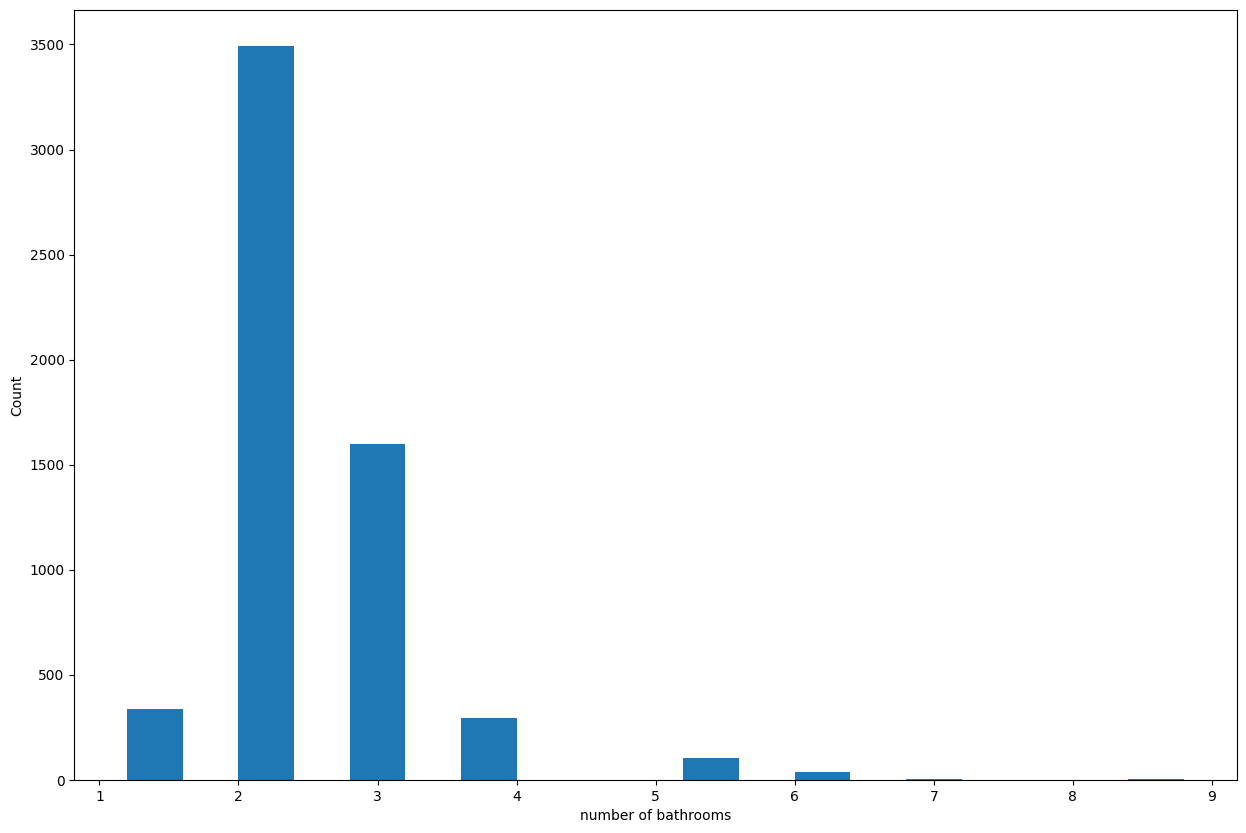

In [43]:
plt.hist(df5.bath,rwidth=0.5)
plt.xlabel("number of bathrooms")
plt.ylabel("Count")

In [44]:
df5=df5[df5.bath<df5.bhk+2]
df5.shape

(5808, 7)

In [71]:
df5=df5.drop(['size','price_sqft'],axis='columns')
df5.head()

,location,total_sqft,bath,price,bhk
0,1st Phase JP Nagar,2825.0,4.0,250.0,4
1,1st Phase JP Nagar,1875.0,3.0,167.0,3
2,1st Phase JP Nagar,1394.0,2.0,100.0,2
3,1st Phase JP Nagar,1077.0,2.0,93.0,2
4,1st Phase JP Nagar,1590.0,3.0,131.0,3


In [72]:
dummies=pd.get_dummies(df5.location)

In [73]:
df6=pd.concat([df5,dummies.drop('other',axis='columns')],axis='columns')
df6.head(3)

,location,total_sqft,bath,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1st Phase JP Nagar,2825.0,4.0,250.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Phase JP Nagar,1875.0,3.0,167.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Phase JP Nagar,1394.0,2.0,100.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df6=df6.drop('location',axis='columns')
df6.head()

,total_sqft,bath,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,250.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,167.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1394.0,2.0,100.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1077.0,2.0,93.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1590.0,3.0,131.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df6.shape

(5808, 147)

In [76]:
X=df6.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1394.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1077.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1590.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
y=df6['price']
y.head()

0    250.0
1    167.0
2    100.0
3     93.0
4    131.0
Name: price, dtype: float64

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [81]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)


0.8912604894017805

In [82]:
# k-fold cross validation

In [84]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.88969012, 0.89189199, 0.9120066 , 0.87318051, 0.87309004])

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model(X,y):
    algos = {
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','frfiedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores =[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

    find_best_model(X,y)

In [117]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return lr_clf.predict([x])[0]

In [120]:
predict_price('Indira Nagar',8000,2,2)

C:\Users\riyab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


624.0953230531366

In [121]:
import pickle
with open('bengaluru_house_prices.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [122]:
import json
columns ={
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))